# Visualization

This noteboo is meant to produce some nice visualizations of our datasets

In [1]:
import pandas as pd
import folium
import json

In [2]:
filename = '../files/listings.csv'
df = pd.read_csv(filename)

df.head()

id                                 name  host_id  host_name  \
0  2454                           superCondo     2688        Ben   
1  2539   Clean & quiet apt home by the park     2787       John   
2  2595                Skylit Midtown Castle     2845   Jennifer   
3  3330   ++ Brooklyn Penthouse Guestroom ++     4177       Jbee   
4  3647  THE VILLAGE OF HARLEM....NEW YORK !     4632  Elisabeth   

  neighbourhood_group neighbourhood   latitude  longitude        room_type  \
0           Manhattan       Midtown  40.755523 -73.967679  Entire home/apt   
1            Brooklyn    Kensington  40.647486 -73.972370     Private room   
2           Manhattan       Midtown  40.753621 -73.983774  Entire home/apt   
3            Brooklyn  Williamsburg  40.708558 -73.942362     Private room   
4           Manhattan        Harlem  40.809018 -73.941902     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    137               7                  1  2019-01-30               1.00   
1    149               1                  9  2018-10-19               0.23   
2    225               1                 43  2019-01-02               0.38   
3     70               5                 39  2018-12-07               0.35   
4    150               3                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  
0                               1                65  
1                               8               365  
2                               2               365  
3                               3               290  
4                               1               365

#### Visualize the number of listings per neighbourhood

In [3]:
neigh_groups = df.groupby("neighbourhood")
sizes_a = pd.DataFrame(neigh_groups.size())
sizes_a.rename(columns={0:"size"},inplace=True)
sizes_a.reset_index(level=0, inplace=True)
sizes_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 2 columns):
neighbourhood    222 non-null object
size             222 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


In [4]:
geo_data = '../files/neighbourhoods.geojson'
with open(geo_data) as f:
    data = json.load(f)
data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-73.766708, 40.614911],
       [-73.768253, 40.614878],
       [-73.773977, 40.616004],
       [-73.773631, 40.616327],
       [-73.768735, 40.620901],
       [-73.767459, 40.620511],
       [-73.766978, 40.616919],
       [-73.766708, 40.614911]]]]},
   'properties': {'neighbourhood': 'Bayswater',
    'neighbourhood_group': 'Queens'}},
  {'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-73.848597, 40.87167],
       [-73.845823, 40.870239],
       [-73.854559, 40.859954],
       [-73.854665, 40.859586],
       [-73.856389, 40.857594],
       [-73.868882, 40.857223],
       [-73.868318, 40.857862],
       [-73.869554, 40.857784],
       [-73.871025, 40.85731],
       [-73.870481, 40.865414],
       [-73.870555, 40.869703],
       [-73.867216, 40.86969],
       [-73.85745, 40.869533],
       [-73.85555, 40.871813],
       [-73.85

In [8]:
#Center the map at Times Square
m_n = folium.Map(location = [40.7589,-73.9851],zoom_start=11)
m_n.choropleth(geo_data='../files/neighbourhoods.geojson', data=sizes_a,
             columns=[ 'neighbourhood','size'],
             key_on='feature.properties.neighbourhood',
             fill_color='RdYlGn', fill_opacity=0.7, line_opacity=0.8,
             legend_name='Distribution of Airbnbs per neighbourhoods')
folium.LayerControl().add_to(m_n)
m_n

#### Visualize the average price of listings per neighbourhoods

In [9]:
df_p = df[['neighbourhood', 'price']]
neigh_price = df_p.groupby('neighbourhood')
sizes_p = pd.DataFrame(neigh_price.mean())
sizes_p.reset_index(level=0, inplace=True)
sizes_p.head()

neighbourhood       price
0       Allerton   88.842105
1  Arden Heights   58.000000
2       Arrochar  106.772727
3        Arverne  175.492754
4        Astoria  112.582893

In [10]:
m_p = folium.Map(location = [40.7589,-73.9851],zoom_start=11)
m_p.choropleth(geo_data='../files/neighbourhoods.geojson', data=sizes_p,
             columns=[ 'neighbourhood','price'],
             key_on='feature.properties.neighbourhood',
             fill_color='RdYlGn', fill_opacity=0.7, line_opacity=0.8,
             legend_name='Mean price of Airbnbs per neighbourhoods')
folium.LayerControl().add_to(m_p)
m_p

#### Visualize the average number of reviews per neighbourhoods

In [11]:
df_r = df[['neighbourhood', 'number_of_reviews']]
neigh_reviews = df_r.groupby('neighbourhood')
sizes_r = pd.DataFrame(neigh_reviews.mean())
sizes_r.reset_index(level=0, inplace=True)
sizes_r.head()

neighbourhood  number_of_reviews
0       Allerton          40.157895
1  Arden Heights          13.500000
2       Arrochar          11.863636
3        Arverne          29.014493
4        Astoria          23.379092

In [12]:
m_r = folium.Map(location = [40.7589,-73.9851],zoom_start=11)
m_r.choropleth(geo_data='../files/neighbourhoods.geojson', data=sizes_r,
             columns=[ 'neighbourhood','number_of_reviews'],
             key_on='feature.properties.neighbourhood',
             fill_color='RdYlGn', fill_opacity=0.7, line_opacity=0.8,
             legend_name='Mean number of reviews per neighbourhoods')
folium.LayerControl().add_to(m_r)
m_r

#### Visualize the repartition of types of rooms per borough

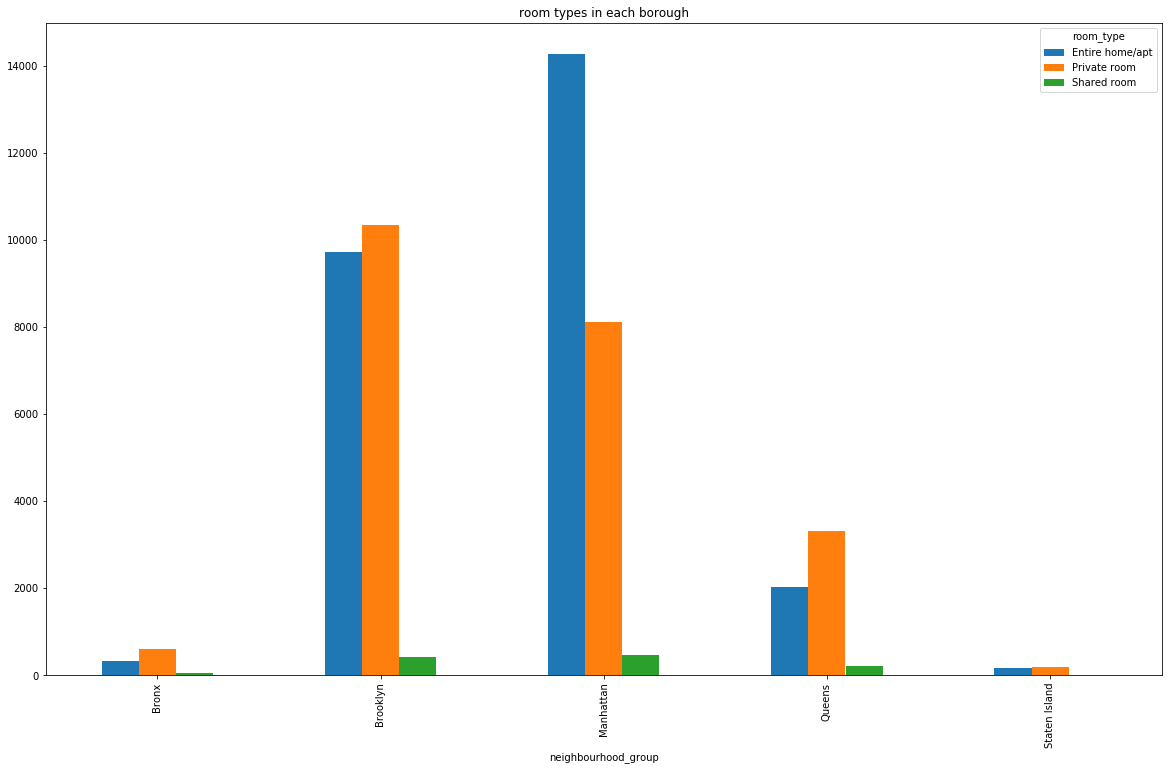

In [15]:
borough_room = df.groupby(['neighbourhood_group', "room_type"])
borough_room.size().unstack().plot(kind='bar',title="room types in each borough",figsize=(20,12))

In [14]:
df_n = df[(df["neighbourhood"] == 'Harlem') | (df["neighbourhood"] == 'Upper West Side') | (df["neighbourhood"] == 'Morningside Heights')]
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5299 entries, 4 to 50220
Data columns (total 16 columns):
id                                5299 non-null int64
name                              5297 non-null object
host_id                           5299 non-null int64
host_name                         5298 non-null object
neighbourhood_group               5299 non-null object
neighbourhood                     5299 non-null object
latitude                          5299 non-null float64
longitude                         5299 non-null float64
room_type                         5299 non-null object
price                             5299 non-null int64
minimum_nights                    5299 non-null int64
number_of_reviews                 5299 non-null int64
last_review                       4185 non-null object
reviews_per_month                 4185 non-null float64
calculated_host_listings_count    5299 non-null int64
availability_365                  5299 non-null int64
dtypes: float64(

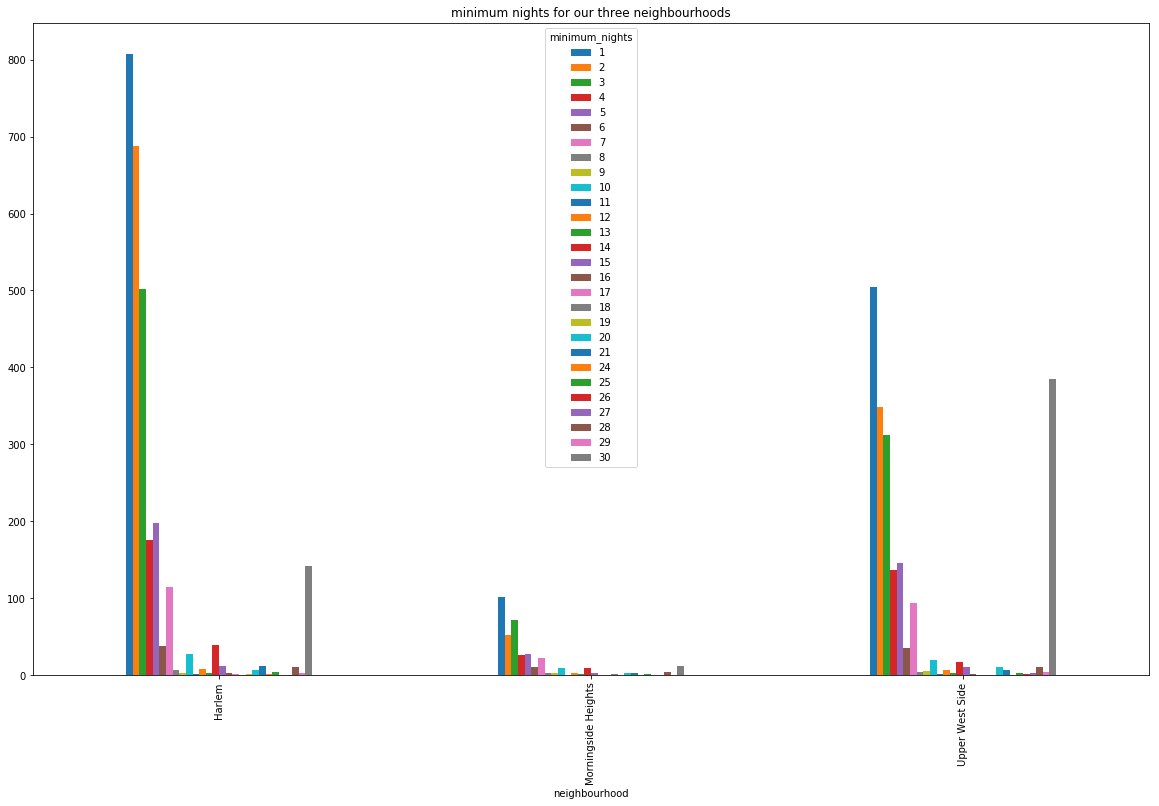

In [16]:
df_n = df_n[df_n["minimum_nights"] <= 30]
neigh_night = df_n.groupby(['neighbourhood', "minimum_nights"])
neigh_night.size().unstack().plot(kind='bar',title="minimum nights for our three neighbourhoods",figsize=(20,12))

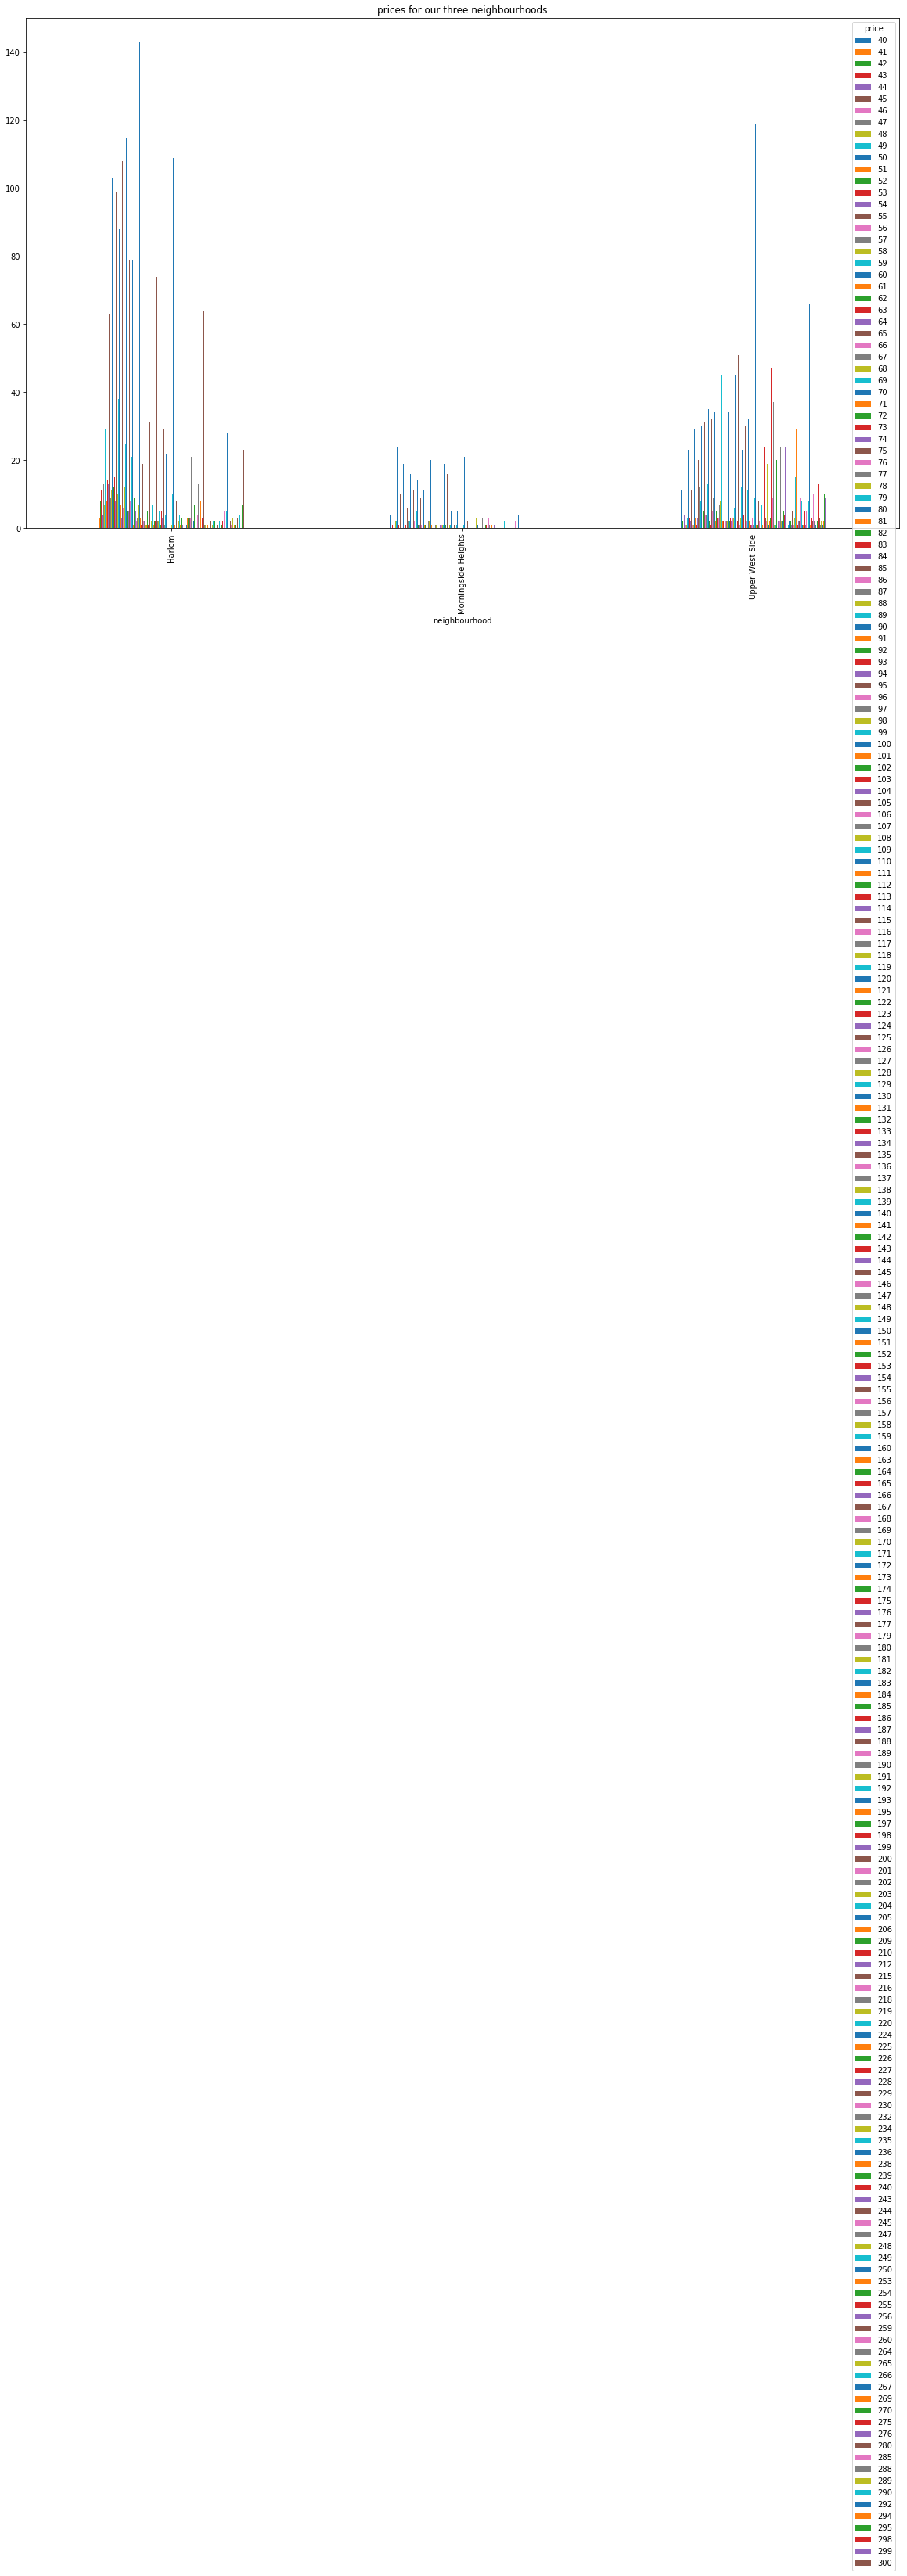

In [17]:
df_n = df_n[(df_n["price"] <= 300) & (df_n["price"] >= 40)]
neigh_price = df_n.groupby(['neighbourhood', "price"])
neigh_price.size().unstack().plot(kind='bar',title="prices for our three neighbourhoods",figsize=(20,12))